# **Processing Text - Final Project**

**03. Public Opinion**

SENTIMENT AND PUBLIC OPINION ANALYSIS ON THE NEW MINISTER OF FINANCE, PURBAYA YUDHI SADEWA, ON THE YOUTUBE PLATFORM USING INDOBERT, DBSCAN, K-MEANS CLUSTERING, AND PROPHET

The Member of the Group 5 of Final Project

- Abdullah Al-Firdaus Nuzula 	(24031554008)
- Halilatunnisa 			        (24031554130)
- Elvira Tiara Suci Tambunan 	(24031554213)

Lecturer: Ulfa Siti Nuraini, S.Stat., M.Stat.


In [140]:
!pip install gensim

In [141]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud

In [143]:
file_id = "1H-1MdtG6KLZhiiDxE-6IKK7MU_0SZBtL"
url = f"https://docs.google.com/spreadsheets/d/{file_id}/export?format=csv"

df_k_means = pd.read_csv(url)
df_k_means.head()

,text_display,stemmed_text,published_at,author,like_count
0,Bagus pak Purbaya sikat kalau sdh ngaco berhub...,bagus purbaya sikat sudah ngaco hubung main uang,11/7/25 9:33,@hendywirawan6870,0
1,Bener sekali kalo mau pinjam kur harus ada ang...,benar sekali mau pinjam kur ada anggun sikat b...,11/7/25 9:32,@Farah-hl5ct,0
2,mantul pak menkeu,mantul menteri,11/7/25 7:55,@indrapujiwiyatno,0
3,kita baru tahu slama bertahun2 slama ini baru ...,baru tahu slama tahun slama baru rapat publik tau,11/6/25 19:33,@marliaheumarvggy5850,0
4,pak purbaya sehat selalu panjang umur,purbaya sehat selalu panjang umur,11/6/25 19:31,@marliaheumarvggy5850,0


#### Cleaning Dataset

In [144]:
print(f"Initial data count: {len(df_k_means)}")
df_k_means["stemmed_text"] = df_k_means["stemmed_text"].astype(str)
df_k_means = df_k_means[df_k_means["stemmed_text"].str.strip() != ""]
df_k_means = df_k_means.dropna(subset=["stemmed_text"])
df_k_means = df_k_means.reset_index(drop=True)
df_k_means["stemmed_text"] = df_k_means["stemmed_text"].replace("nan", "")
df_k_means["stemmed_text"] = df_k_means["stemmed_text"].fillna("")

print(f"Number of data after cleaning empty values:  {len(df_k_means)}")

Initial data count: 6304
Number of data after cleaning empty values:  6304


In [145]:
custom_stop_words = [
    'yang', 'di', 'dan', 'itu', 'dari', 'ini', 'ke', 'akan', 'pada', 'untuk',
    'dengan', 'adalah', 'ya', 'yak', 'nya', 'yg', 'kalo', 'kalau', 'kl',
    'tidak', 'tak', 'gak', 'ga', 'bukan', 'ada', 'bisa', 'jadi', 'buat',
    'sama', 'banyak', 'lebih', 'sangat', 'sudah', 'sdh', 'aja', 'saja',
    'bapak', 'pak', 'bpk', 'purbaya', 'sadewa', 'menteri', 'menkeu', 'keuangan',
    'indonesia', 'negara', 'rakyat', 'presiden', 'prabowo', 'sri', 'mulyani', 'tri',
    'orang', 'org', 'uang', 'moga', 'semoga', 'amin', 'aamiin', 'selalu',
    'sehat', 'terus', 'semangat', 'mantap', 'sukses', 'maju', 'jabat', 'masya', 'allah',
    'nan', 'null'
]

### **TF-IDF**

In [146]:
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 1),
    min_df=2,
    max_df=0.95,
    stop_words=custom_stop_words
)

texts = df_k_means["stemmed_text"].astype(str)
X = vectorizer.fit_transform(texts)

In [147]:
tfidf_table = pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out()
)

tfidf_table

,aalamiin,aamiiin,aamiinn,aamiinyra,aamin,aammiin,abadi,abah,abai,abal,...,yuk,yusuf,yutub,yv,zakat,zalim,zaman,zolim,zona,zonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
zero_elements = X.count_nonzero()
total_elements = X.shape[0] * X.shape[1]

sparsity = 1 - (zero_elements / total_elements)

print(f"Jumlah dokumen       : {X.shape[0]}")
print(f"Jumlah fitur (term)  : {X.shape[1]}")
print(f"Total elemen         : {total_elements}")
print(f"Elemen non-zero      : {zero_elements}")
print(f"Sparsity TF-IDF      : {sparsity:.4f}")
print(f"Sparsity (%)         : {sparsity * 100:.2f}%")

Jumlah dokumen       : 6304
Jumlah fitur (term)  : 3835
Total elemen         : 24175840
Elemen non-zero      : 46263
Sparsity TF-IDF      : 0.9981
Sparsity (%)         : 99.81%


In [149]:
output_path = "/content/drive/MyDrive/PEMTEKS/Cleaning_Data_KMeans.xlsx"
print(f"Menyimpan file ke: {output_path}...")
tfidf_table.to_csv(output_path, index=False)

print("Selesai!")

Menyimpan file ke: /content/drive/MyDrive/PEMTEKS/Cleaning_Data_KMeans.xlsx...
Selesai!


### **K-Means**

In [150]:
tfidf_df = tfidf_table
tfidf_df.shape

(6304, 3835)

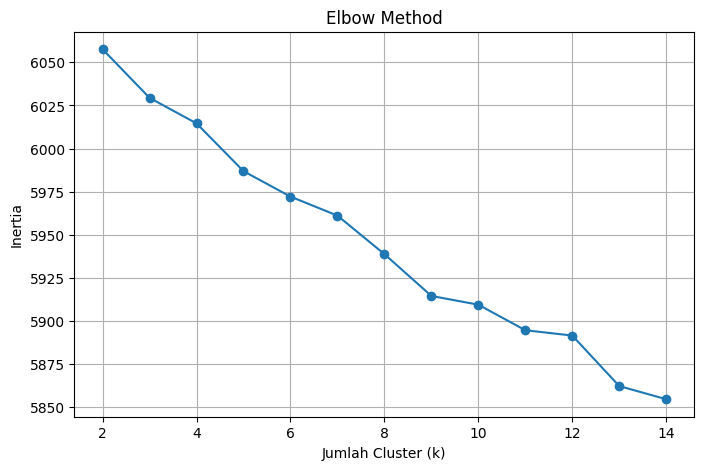

In [151]:
# Elbow Method
inertias = []
K = range(2, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(tfidf_df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [152]:
candidate_k = [4, 5]

best_k = None
best_score = -1

for k in candidate_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(tfidf_df)

    score = silhouette_score(tfidf_df, labels)
    print(f"k = {k}: silhouette score = {score:4f}")

    if score > best_score:
        best_score = score
        best_k = k

print(f"Best K according to Silhouette = {best_k}")
print(f"Highest Score = {best_score}")

k_best = best_k

k = 4: silhouette score = 0.012309
k = 5: silhouette score = 0.013360
Best K according to Silhouette = 5
Highest Score = 0.013359729617601774


In [153]:
k_best = best_k
print(f"Melatih K-Means dengan k={k_best}...")
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(tfidf_df)

file_id = "1H-1MdtG6KLZhiiDxE-6IKK7MU_0SZBtL"
cleaning_data_kmeans = f"https://docs.google.com/spreadsheets/d/{file_id}/export?format=csv"

data_asli = pd.read_csv(cleaning_data_kmeans)

data_asli["stemmed_text"] = data_asli["stemmed_text"].astype(str).replace("nan", "").fillna("")
data_asli = data_asli[data_asli["stemmed_text"].str.strip() != ""]
data_asli = data_asli.dropna(subset=["stemmed_text"])
data_asli = data_asli.reset_index(drop=True)

print(f"Jumlah baris setelah disinkronkan: {len(data_asli)}")
print(f"Jumlah label dari K-Means: {len(labels)}")

if len(data_asli) != len(labels):
    print(f"Panjang data tidak sama Asli: {len(data_asli)}, Label: {len(labels)}")
else:
    print("Sinkronisasi berhasil. Menambahkan label cluster...")
    data_asli["cluster"] = labels

    data_asli.to_csv("Data_with_cluster.csv", index=False)
    print("File 'Data_with_cluster.csv' berhasil disimpan.")

    display(data_asli.head())

Melatih K-Means dengan k=5...
Jumlah baris setelah disinkronkan: 6304
Jumlah label dari K-Means: 6304
Sinkronisasi berhasil. Menambahkan label cluster...
File 'Data_with_cluster.csv' berhasil disimpan.


,text_display,stemmed_text,published_at,author,like_count,cluster
0,Bagus pak Purbaya sikat kalau sdh ngaco berhub...,bagus purbaya sikat sudah ngaco hubung main uang,11/7/25 9:33,@hendywirawan6870,0,1
1,Bener sekali kalo mau pinjam kur harus ada ang...,benar sekali mau pinjam kur ada anggun sikat b...,11/7/25 9:32,@Farah-hl5ct,0,3
2,mantul pak menkeu,mantul menteri,11/7/25 7:55,@indrapujiwiyatno,0,1
3,kita baru tahu slama bertahun2 slama ini baru ...,baru tahu slama tahun slama baru rapat publik tau,11/6/25 19:33,@marliaheumarvggy5850,0,1
4,pak purbaya sehat selalu panjang umur,purbaya sehat selalu panjang umur,11/6/25 19:31,@marliaheumarvggy5850,0,1



WordCloud Cluster Analysis 0
Key points of word : 
['pajak', 'naik', 'bayar', 'baru', 'turun', 'jangan', 'cukai', 'naikin', 'peras', 'pegawai', 'bea', 'nilai', 'kena', 'jalan', 'bijak', 'tambah', 'korupsi', 'hasil', 'ekonomi', 'lama']


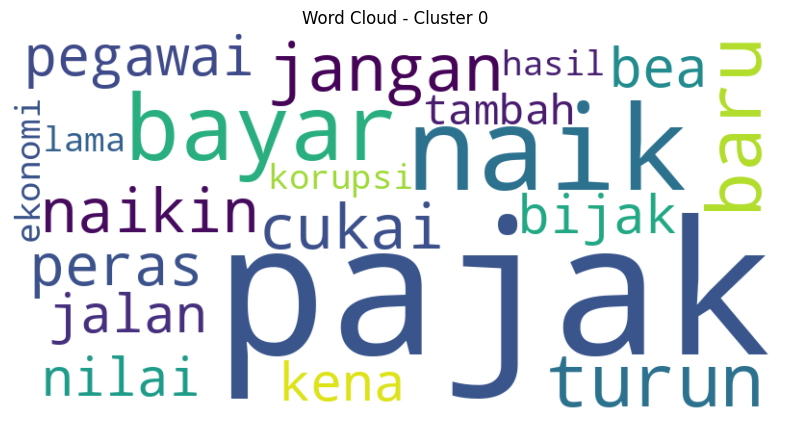


WordCloud Cluster Analysis 1
Key points of word : 
['kerja', 'jangan', 'baru', 'pur', 'korupsi', 'bicara', 'dukung', 'lihat', 'ekonomi', 'ganti', 'ibu', 'anak', 'koruptor', 'pa', 'keren', 'kdm', 'kaya', 'punya', 'harus', 'takut']


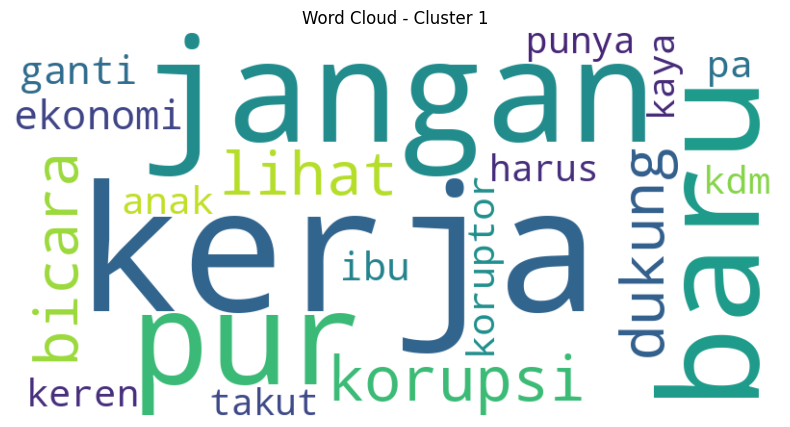


WordCloud Cluster Analysis 2
Key points of word : 
['wakil', 'dewan', 'anggota', 'takut', 'bubar', 'korupsi', 'kan', 'jangan', 'gaji', 'bicara', 'republik', 'partai', 'uu', 'harus', 'dukung', 'dpd', 'ampas', 'mau', 'satu', 'guna']


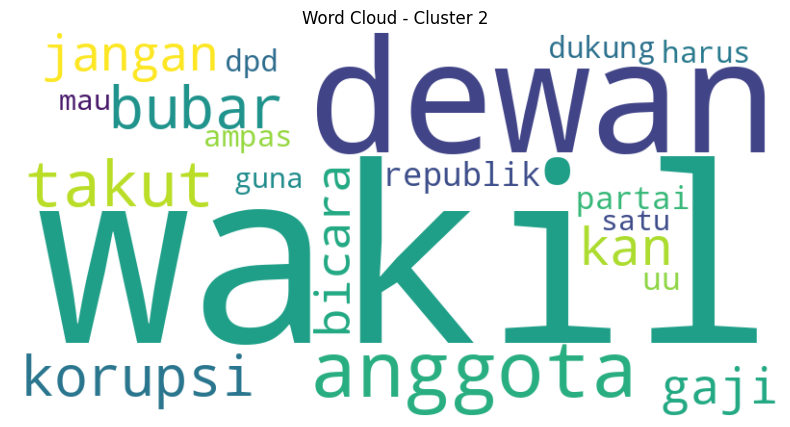


WordCloud Cluster Analysis 3
Key points of word : 
['benar', 'kur', 'bank', 'bri', 'pinjam', 'agun', 'jt', 'jamin', 'minta', 'pakai', 'anggun', 'juta', 'sertifikat', 'dana', 'bunga', 'habis', 'daerah', 'sulit', 'bawah', 'kata']


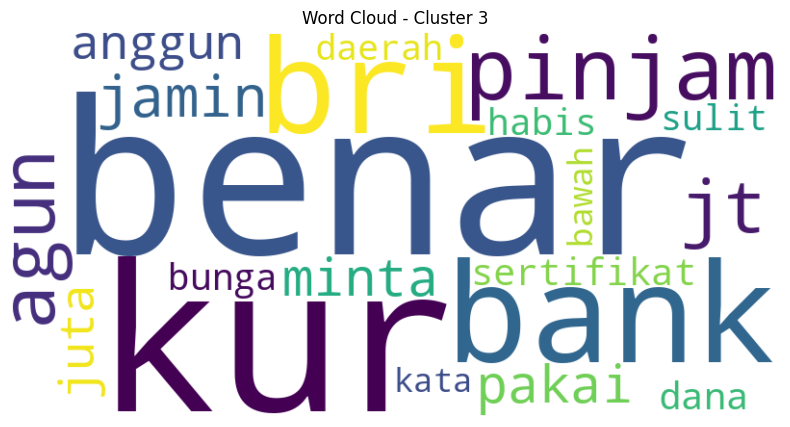


WordCloud Cluster Analysis 4
Key points of word : 
['baik', 'lindung', 'amanah', 'alhamdulillah', 'swt', 'alloh', 'ekonomi', 'jujur', 'beliau', 'doa', 'jaga', 'selamat', 'tugas', 'jalan', 'baru', 'kerja', 'beri', 'keluarga', 'jahat', 'jangan']


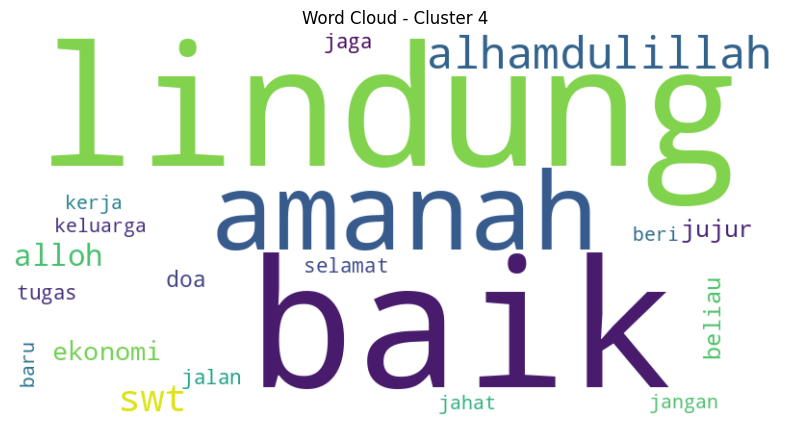

In [154]:
tfidf_df["cluster"] = labels

feature_names = [c for c in tfidf_df.columns if c != "cluster"]

for c in sorted(tfidf_df["cluster"].unique()):
    print(f"\nWordCloud Cluster Analysis {c}")

    cluster_data = tfidf_df[tfidf_df["cluster"] == c][feature_names]

    mean_scores = cluster_data.mean(axis=0)
    top_words = mean_scores.sort_values(ascending=False).head(20)
    print("Key points of word : ")
    print(top_words.index.tolist())

    if top_words.sum() > 0:
        wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis")
        wordcloud = wordcloud.generate_from_frequencies(top_words.to_dict())

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud - Cluster {c}")
        plt.show()
    else:
        print("Cluster ini kosong/tidak cukup data.")

### **Bag of Words**

In [155]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_bow = CountVectorizer(
    max_features=5000,
    ngram_range=(1,1),
    min_df=2,
    max_df=0.95,
    stop_words=custom_stop_words
)

texts = df_k_means["stemmed_text"].astype(str)
X_bow = vectorizer_bow.fit_transform(texts)

In [156]:
bow_table = pd.DataFrame(
    X_bow.toarray(),
    columns=vectorizer_bow.get_feature_names_out()
)

bow_table

,aalamiin,aamiiin,aamiinn,aamiinyra,aamin,aammiin,abadi,abah,abai,abal,...,yuk,yusuf,yutub,yv,zakat,zalim,zaman,zolim,zona,zonk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
(bow_table.sum() == 0).sum()
(bow_table.sum(axis=1) == 0).sum()

np.int64(188)

In [158]:
import numpy as np

total_values = X_bow.shape[0] * X_bow.shape[1]
nonzero = X_bow.count_nonzero()
sparsity = 1 - (nonzero / total_values)

print("Total nilai:", total_values)
print("Non-zero:", nonzero)
print("Sparsity:", sparsity)

Total nilai: 24175840
Non-zero: 46263
Sparsity: 0.9980863953434503


In [159]:
output_path = "/content/BOW_Output.csv"
bow_table.to_csv(output_path, index=False)

print("Selesai menyimpan CSV:", output_path)

Selesai menyimpan CSV: /content/BOW_Output.csv


### **DBSCAN**

In [160]:
bow_table = pd.read_csv("/content/BOW_Output.csv")
print("Hasil BoW shape:", bow_table.shape)

Hasil BoW shape: (6304, 3835)


In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
X_scaled = scaler.fit_transform(bow_table)

dbscan = DBSCAN(eps=20, min_samples=5)
labels_eps20 = dbscan.fit_predict(X_scaled)

df_dbscan = data_asli.copy()
df_dbscan["cluster_eps20"] = labels_eps20

df_dbscan.head()

,text_display,stemmed_text,published_at,author,like_count,cluster,cluster_eps20
0,Bagus pak Purbaya sikat kalau sdh ngaco berhub...,bagus purbaya sikat sudah ngaco hubung main uang,11/7/25 9:33,@hendywirawan6870,0,1,-1
1,Bener sekali kalo mau pinjam kur harus ada ang...,benar sekali mau pinjam kur ada anggun sikat b...,11/7/25 9:32,@Farah-hl5ct,0,3,0
2,mantul pak menkeu,mantul menteri,11/7/25 7:55,@indrapujiwiyatno,0,1,-1
3,kita baru tahu slama bertahun2 slama ini baru ...,baru tahu slama tahun slama baru rapat publik tau,11/6/25 19:33,@marliaheumarvggy5850,0,1,-1
4,pak purbaya sehat selalu panjang umur,purbaya sehat selalu panjang umur,11/6/25 19:31,@marliaheumarvggy5850,0,1,0


In [162]:
pd.Series(labels_eps20).value_counts()

,count
-1,4877
0,1385
2,8
1,7
4,6
5,6
6,5
3,5
7,5


In [163]:
unique20, count20 = np.unique(labels_eps20, return_counts=True)
print("DBSCAN eps=20:", dict(zip(unique20, count20)))

DBSCAN eps=20: {np.int64(-1): np.int64(4877), np.int64(0): np.int64(1385), np.int64(1): np.int64(7), np.int64(2): np.int64(8), np.int64(3): np.int64(5), np.int64(4): np.int64(6), np.int64(5): np.int64(6), np.int64(6): np.int64(5), np.int64(7): np.int64(5)}


In [164]:
for c in sorted(df_dbscan["cluster_eps20"].unique()):
    print(f"\n Cluster {c} (jumlah: {(df_dbscan['cluster_eps20'] == c).sum()})")
    print(df_dbscan[df_dbscan["cluster_eps20"] == c]["stemmed_text"].head(10).to_list())


 Cluster -1 (jumlah: 4877)
['bagus purbaya sikat sudah ngaco hubung main uang', 'mantul menteri', 'baru tahu slama tahun slama baru rapat publik tau', 'danantara bagai tempat eksekusi koruptor jaga negara spt kpk', 'guna kur memang lah atas jt lah pake agun kalau bungany minimalisir dan pinjam jangan naik bunga kemudian laku plunasan lebih awal jangan kena pinalti persen lunas lbh cepat kan juga senang kemudian batas kur pinjam untuk durasi pinjamanannya', 'kur bwh jt hrs jamin coz kredit macet tinggiitu moral obligation z mau tnpa jamin minimal transaksi cash flownya bank tsb bln lihat omzet', 'nyata d lapang beda tri saya buka warung ken pinjam harus jamin', 'periksa bapak bank bank salur kur juta pakai anggun kenyataanya', 'inget waktu rapat kemarin baik kanan kiri bapak adalah serigala', 'kur juga main masa blokir angsur sampe x ibarat pinjam cair sampe kpotong admin bunga itung juta']

 Cluster 0 (jumlah: 1385)
['benar sekali mau pinjam kur ada anggun sikat bapak', 'purbaya sehat

Perbandingan dengan epsilon 2.0 dan 20

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
X_scaled = scaler.fit_transform(bow_table)

dbscan = DBSCAN(eps=2.0, min_samples=5)
labels_eps2 = dbscan.fit_predict(X_scaled)

df_dbscan = data_asli.copy()
df_dbscan["cluster_eps2"] = labels_eps2

df_dbscan.head()

,text_display,stemmed_text,published_at,author,like_count,cluster,cluster_eps2
0,Bagus pak Purbaya sikat kalau sdh ngaco berhub...,bagus purbaya sikat sudah ngaco hubung main uang,11/7/25 9:33,@hendywirawan6870,0,1,-1
1,Bener sekali kalo mau pinjam kur harus ada ang...,benar sekali mau pinjam kur ada anggun sikat b...,11/7/25 9:32,@Farah-hl5ct,0,3,-1
2,mantul pak menkeu,mantul menteri,11/7/25 7:55,@indrapujiwiyatno,0,1,-1
3,kita baru tahu slama bertahun2 slama ini baru ...,baru tahu slama tahun slama baru rapat publik tau,11/6/25 19:33,@marliaheumarvggy5850,0,1,-1
4,pak purbaya sehat selalu panjang umur,purbaya sehat selalu panjang umur,11/6/25 19:31,@marliaheumarvggy5850,0,1,-1


In [166]:
unique2, count2 = np.unique(labels_eps2, return_counts=True)
print("DBSCAN eps=2.0:", dict(zip(unique2, count2)))

DBSCAN eps=2.0: {np.int64(-1): np.int64(6007), np.int64(0): np.int64(189), np.int64(1): np.int64(5), np.int64(2): np.int64(9), np.int64(3): np.int64(7), np.int64(4): np.int64(7), np.int64(5): np.int64(6), np.int64(6): np.int64(13), np.int64(7): np.int64(6), np.int64(8): np.int64(12), np.int64(9): np.int64(13), np.int64(10): np.int64(5), np.int64(11): np.int64(5), np.int64(12): np.int64(5), np.int64(13): np.int64(5), np.int64(14): np.int64(5), np.int64(15): np.int64(5)}


In [167]:
for c in sorted(df_dbscan["cluster_eps2"].unique()):
    print(f"\n Cluster {c} (jumlah: {(df_dbscan['cluster_eps2'] == c).sum()})")
    print(df_dbscan[df_dbscan["cluster_eps2"] == c]["stemmed_text"].head(10).to_list())


 Cluster -1 (jumlah: 6007)
['bagus purbaya sikat sudah ngaco hubung main uang', 'benar sekali mau pinjam kur ada anggun sikat bapak', 'mantul menteri', 'baru tahu slama tahun slama baru rapat publik tau', 'purbaya sehat selalu panjang umur', 'pecat masih orang pintar akan kerja', 'baru kali lihat bicara sombong ikut senangsehat', 'betul minta agun yang daerah rasa', 'danantara bagai tempat eksekusi koruptor jaga negara spt kpk', 'guna kur memang lah atas jt lah pake agun kalau bungany minimalisir dan pinjam jangan naik bunga kemudian laku plunasan lebih awal jangan kena pinalti persen lunas lbh cepat kan juga senang kemudian batas kur pinjam untuk durasi pinjamanannya']

 Cluster 0 (jumlah: 189)
['prabowo backup terus ini', 'mantap', 'terus rockn n roll purbaya', 'allohumma aamiin', 'sri mulyanijkw sadewalbp lbpjkw', 'uang tololblunder', 'zong', 'semanggat terus', 'sehat selalu tri', 'purbayakerjanyatapaktalainsirokigerungyg hanyamodalbacotdoang purbayasangatdidukungdiangkat olehpersi

### Visualization TF-IDF with K-Means Clustering

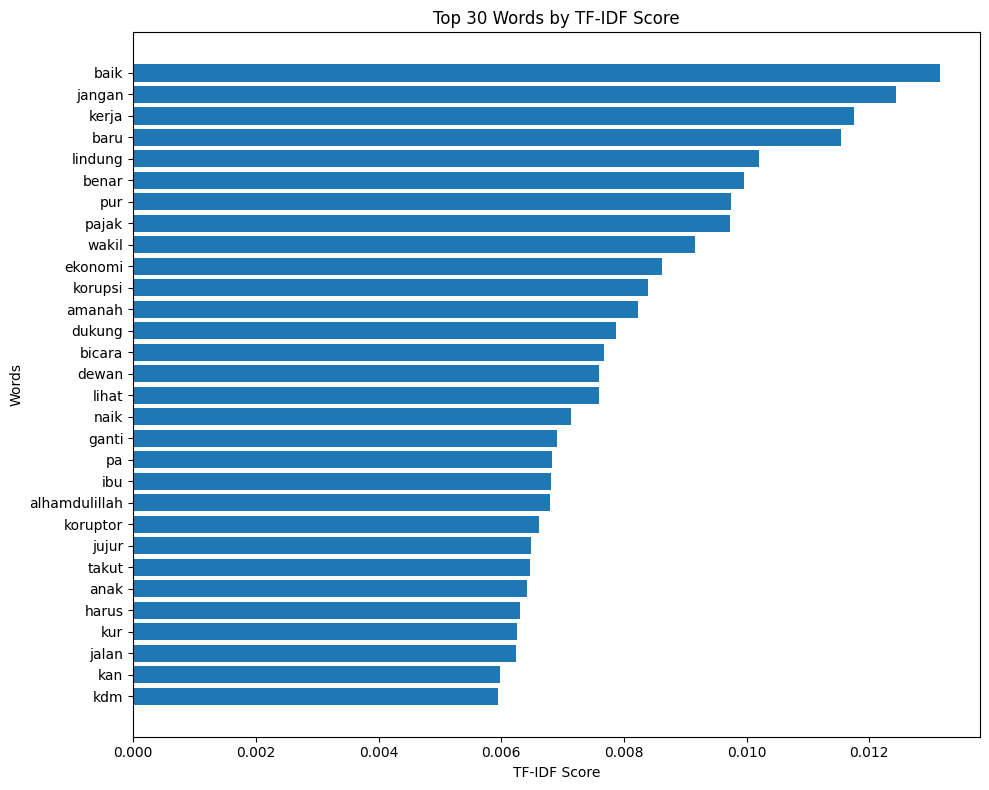

In [168]:
import numpy as np
import matplotlib.pyplot as plt

tfidf_mean = np.mean(tfidf_df.drop(columns=["cluster"]), axis=0)
top_30 = tfidf_mean.sort_values(ascending=False).head(30)

plt.figure(figsize=(10, 8))
plt.barh(top_30.index[::-1], top_30.values[::-1])
plt.title("Top 30 Words by TF-IDF Score")
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

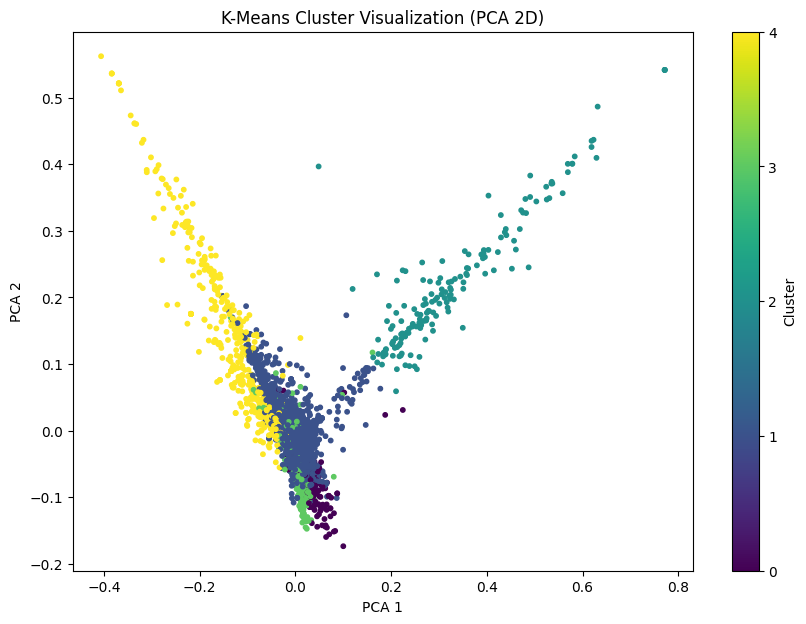

In [169]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

labels_kmeans = kmeans.labels_

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_kmeans, s=10)

plt.title("K-Means Cluster Visualization (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, ticks=[0,1,2,3,4], label="Cluster")
plt.show()

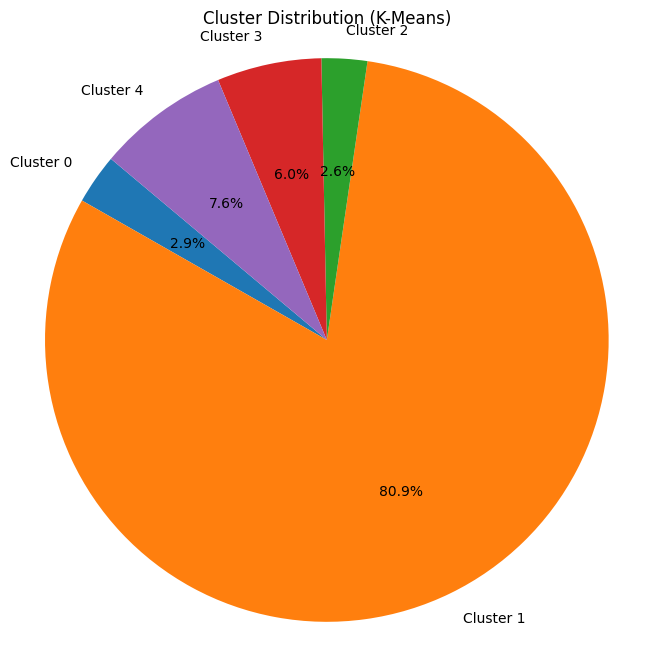

In [170]:
import numpy as np
import matplotlib.pyplot as plt

unique, counts = np.unique(labels_kmeans, return_counts=True)
cluster_counts = dict(zip(unique, counts))

labels = [f"Cluster {i}" for i in cluster_counts.keys()]
sizes = cluster_counts.values()

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Cluster Distribution (K-Means)")
plt.axis('equal')
plt.show()

### Visualization BoW with DBSCAN Clustering

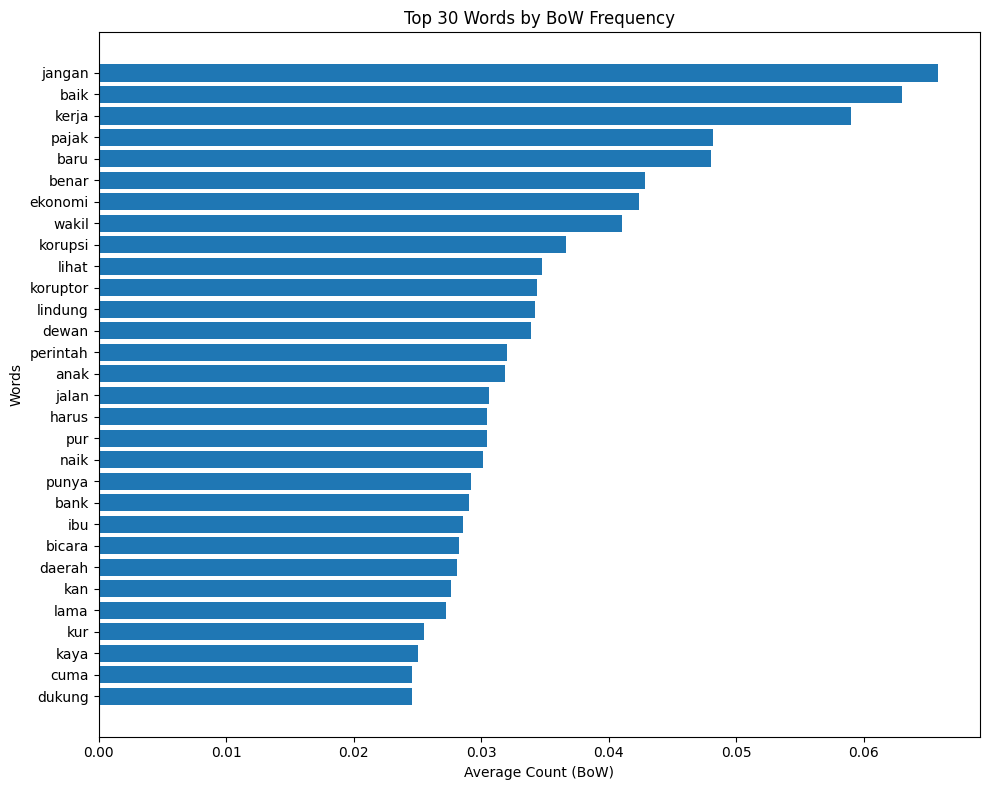

In [171]:
import numpy as np
import matplotlib.pyplot as plt

bow_table["cluster"] = labels_eps20

bow_mean = np.mean(bow_table.drop(columns=["cluster"]), axis=0)

top_30_bow = bow_mean.sort_values(ascending=False).head(30)

plt.figure(figsize=(10, 8))
plt.barh(top_30_bow.index[::-1], top_30_bow.values[::-1])
plt.title("Top 30 Words by BoW Frequency")
plt.xlabel("Average Count (BoW)")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

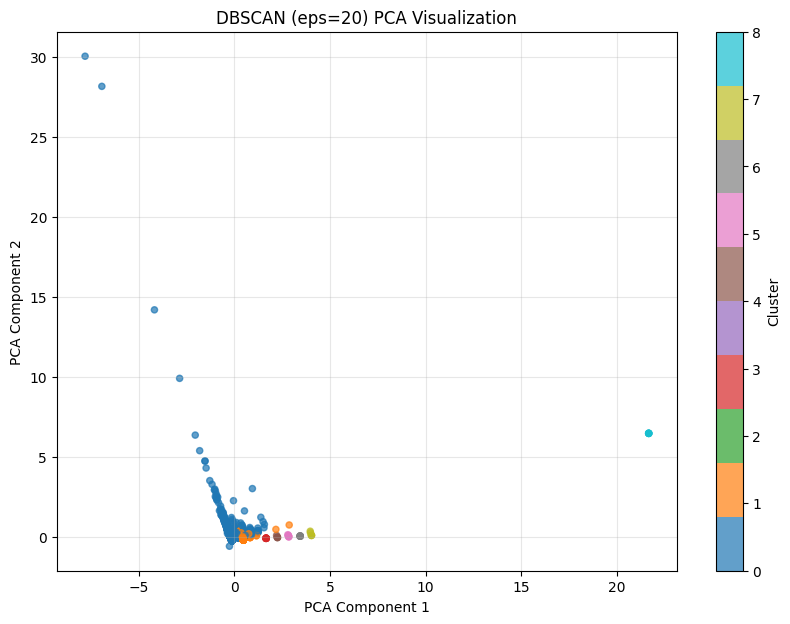

In [172]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

bow_features = bow_table.values
labels_numeric = bow_table["cluster"].astype('category').cat.codes

pca = PCA(n_components=2)
bow_2d = pca.fit_transform(bow_features)

plt.figure(figsize=(10, 7))

scatter = plt.scatter(
    bow_2d[:, 0],
    bow_2d[:, 1],
    c=labels_numeric,
    cmap="tab10",
    s=20,
    alpha=0.7
)

plt.title("DBSCAN (eps=20) PCA Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.colorbar(scatter, label="Cluster")
plt.grid(True, alpha=0.3)

plt.show()

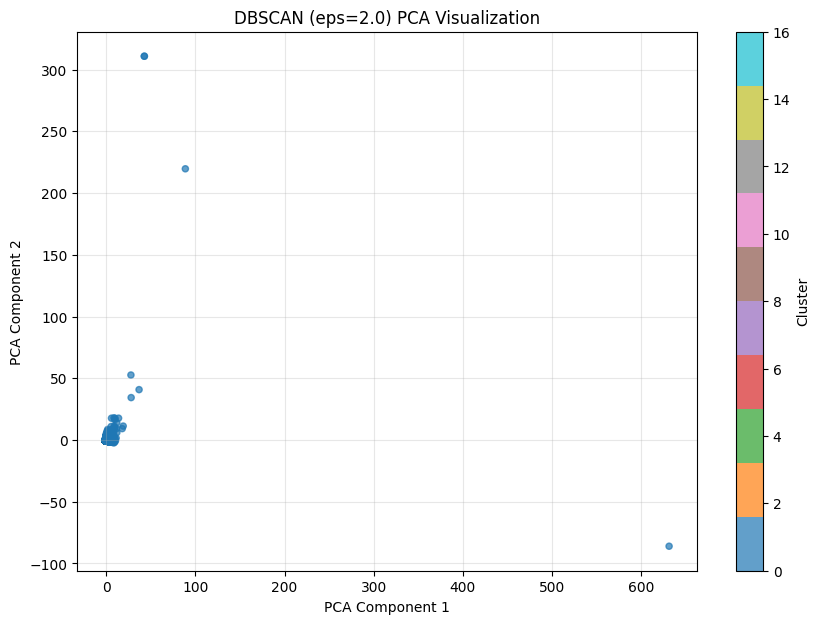

In [173]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

dbscan_eps2 = DBSCAN(eps=2.0, min_samples=5)
labels_eps2 = dbscan_eps2.fit_predict(X_scaled)
labels_numeric = pd.factorize(labels_eps2)[0]

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))

scatter = plt.scatter(
    X_2d[:, 0],
    X_2d[:, 1],
    c=labels_numeric,
    cmap="tab10",
    s=20,
    alpha=0.7
)

plt.title("DBSCAN (eps=2.0) PCA Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.colorbar(scatter, label="Cluster")
plt.grid(True, alpha=0.3)
plt.show()

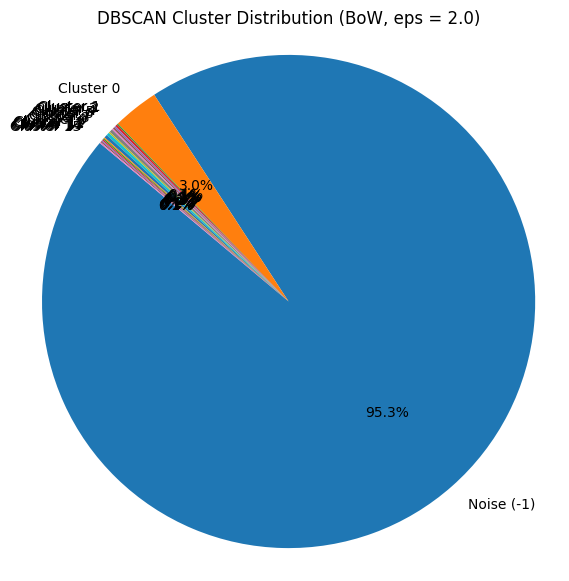

In [174]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

dbscan_eps2 = DBSCAN(eps=2.0, min_samples=5).fit(X_scaled)
labels_eps2 = dbscan_eps2.labels_

unique2, counts2 = np.unique(labels_eps2, return_counts=True)
cluster_counts_eps2 = dict(zip(unique2, counts2))

labels2 = ["Noise (-1)" if u == -1 else f"Cluster {u}" for u in unique2]
sizes2 = counts2

plt.figure(figsize=(7,7))
plt.pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=140)
plt.title("DBSCAN Cluster Distribution (BoW, eps = 2.0)")
plt.axis('equal')
plt.show()

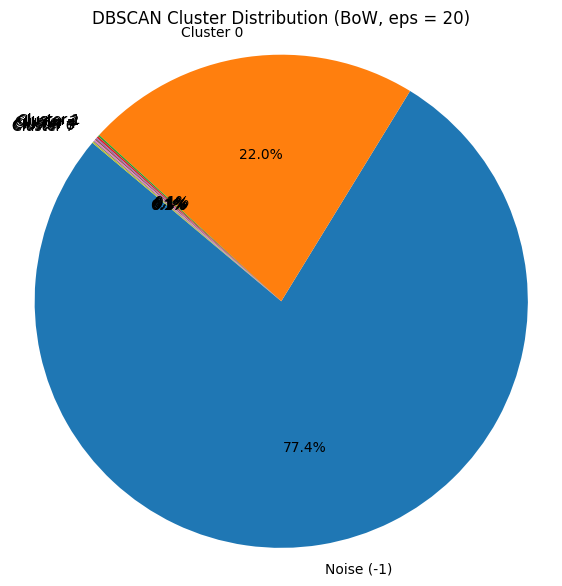

In [175]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

dbscan_eps20 = DBSCAN(eps=20, min_samples=5).fit(X_scaled)
labels_eps20 = dbscan_eps20.labels_

unique20, counts20 = np.unique(labels_eps20, return_counts=True)
cluster_counts_eps20 = dict(zip(unique20, counts20))

labels20 = ["Noise (-1)" if u == -1 else f"Cluster {u}" for u in unique20]
sizes20 = counts20

plt.figure(figsize=(7,7))
plt.pie(sizes20, labels=labels20, autopct='%1.1f%%', startangle=140)
plt.title("DBSCAN Cluster Distribution (BoW, eps = 20)")
plt.axis('equal')
plt.show()

✓ Date: published_at


/tmp/ipython-input-4118695788.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_k_means[date_col] = pd.to_datetime(df_k_means[date_col], errors="coerce")


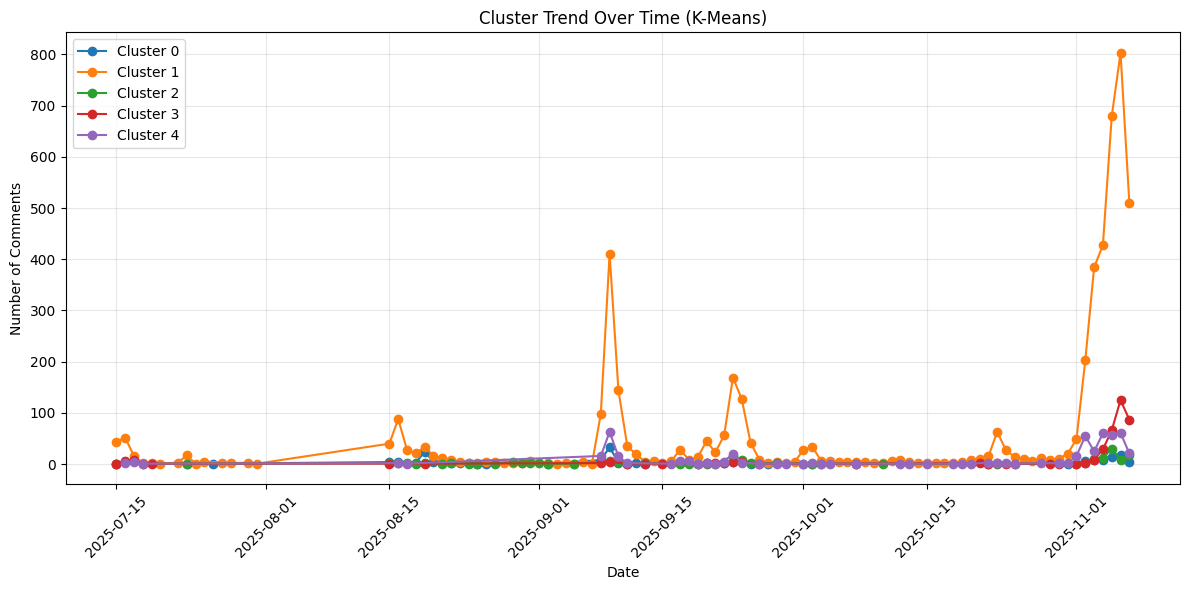

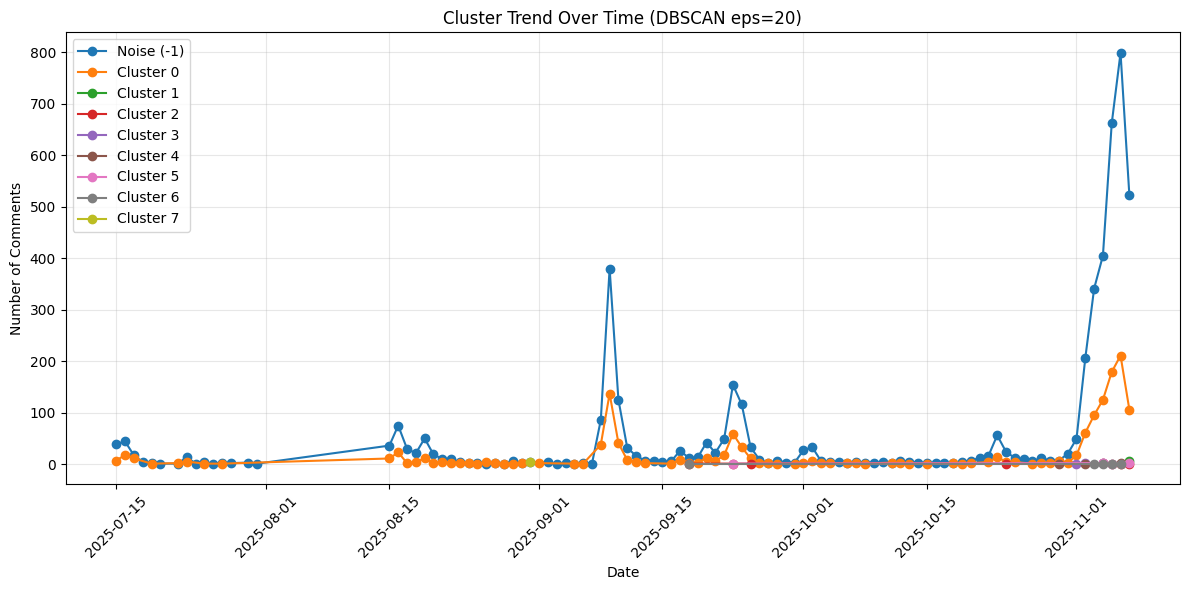

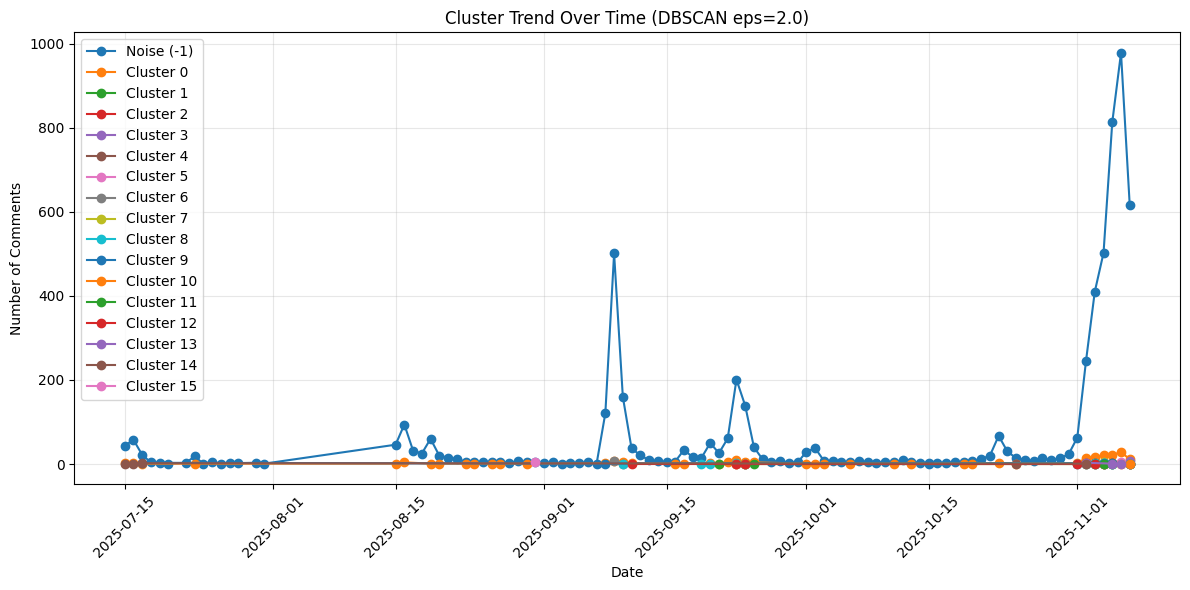

In [176]:
date_column_candidates = ["published_at", "timestamp", "date", "created_at", "upload_date"]
date_col = None

for col in date_column_candidates:
    if col in df_k_means.columns:
        date_col = col
        break

if date_col is None:
    raise ValueError("Tidak ditemukan kolom tanggal! Tambahkan kolom timestamp terlebih dahulu.")

print(f"✓ Date: {date_col}")
df_k_means[date_col] = pd.to_datetime(df_k_means[date_col], errors="coerce")
df_k_means["date_only"] = df_k_means[date_col].dt.date

# 1. K-MEANS CLUSTER TREND
if "cluster" not in df_k_means.columns:
    df_k_means["cluster"] = labels_kmeans

trend_kmeans = df_k_means.groupby(["date_only", "cluster"]).size().reset_index(name="count")

plt.figure(figsize=(12, 6))

for cluster_id in sorted(trend_kmeans["cluster"].unique()):
    subset = trend_kmeans[trend_kmeans["cluster"] == cluster_id]
    plt.plot(subset["date_only"], subset["count"], marker="o", label=f"Cluster {cluster_id}")

plt.title("Cluster Trend Over Time (K-Means)")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. DBSCAN (eps = 20) Cluster Trend
df_dbscan_20 = df_k_means.copy()
df_dbscan_20["cluster_eps20"] = labels_eps20

trend_eps20 = df_dbscan_20.groupby(["date_only", "cluster_eps20"]).size().reset_index(name="count")

plt.figure(figsize=(12, 6))
for cluster_id in sorted(trend_eps20["cluster_eps20"].unique()):
    subset = trend_eps20[trend_eps20["cluster_eps20"] == cluster_id]
    label_name = "Noise (-1)" if cluster_id == -1 else f"Cluster {cluster_id}"
    plt.plot(subset["date_only"], subset["count"], marker="o", label=label_name)

plt.title("Cluster Trend Over Time (DBSCAN eps=20)")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. DBSCAN (eps = 2.0) Cluster Trend
df_dbscan_2 = df_k_means.copy()
df_dbscan_2["cluster_eps2"] = labels_eps2

trend_eps2 = df_dbscan_2.groupby(["date_only", "cluster_eps2"]).size().reset_index(name="count")

plt.figure(figsize=(12, 6))

for cluster_id in sorted(trend_eps2["cluster_eps2"].unique()):
    subset = trend_eps2[trend_eps2["cluster_eps2"] == cluster_id]
    label_name = "Noise (-1)" if cluster_id == -1 else f"Cluster {cluster_id}"
    plt.plot(subset["date_only"], subset["count"], marker="o", label=label_name)

plt.title("Cluster Trend Over Time (DBSCAN eps=2.0)")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()